執行同學：陳芝宇

執行統計檢測(IIT test, Normal Distribution檢定), PCA降維，Min Max Scaler及線性迴歸預測

## Import Model

In [1]:
import os
import sys
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import torch
#from torch.autograd import Variable

## Read data from csv using Pandas

In [3]:
df = pd.read_csv('train_data-2018-09-29-2019-09-29.csv')
df.head()

,Date,VFINX(t-1),TROW(t-1),AME(t-1),HON(t-1),DFS(t-1),ALL(t-1),ACN(t-1),ANSS(t-1),IEX(t-1),...,FMC(t-1),ADP(t-1),ADBE(t-1),PFG(t-1),VFC(t-1),J(t-1),TEL(t-1),KSU(t-1),OKE(t-1),VFINX
0,2018-10-02,260.239471,103.538559,78.568626,154.321274,72.776505,94.539589,167.113846,186.000000,146.973923,...,73.115768,144.150208,275.489990,53.536732,83.702904,75.731094,83.194809,113.995712,57.925274,260.143127
1,2018-10-03,260.143127,104.820305,78.539040,153.941116,73.345573,94.846626,166.767136,182.210007,145.816498,...,74.699257,145.135178,272.000000,53.774277,83.380348,75.868683,83.271461,111.942970,57.026356,260.326233
2,2018-10-04,260.326233,105.348068,78.677048,153.338425,73.990540,94.817833,167.720612,182.220001,146.837753,...,76.641113,144.963043,270.510010,54.642189,84.043381,76.281441,83.166061,110.945923,57.488415,258.254456
3,2018-10-05,258.254456,104.424477,78.115204,152.717224,73.734451,95.412743,165.524673,175.380005,145.728958,...,76.066055,143.652939,263.709991,55.336517,81.937820,76.517296,82.552856,111.444450,57.530418,256.837982
4,2018-10-08,256.837982,103.029625,77.523804,152.123840,72.861847,95.556664,164.917877,173.750000,144.007416,...,75.557678,144.389282,263.220001,54.815769,81.955727,75.220070,80.665329,109.577431,57.639633,256.731964


## Visualize histogram of all features

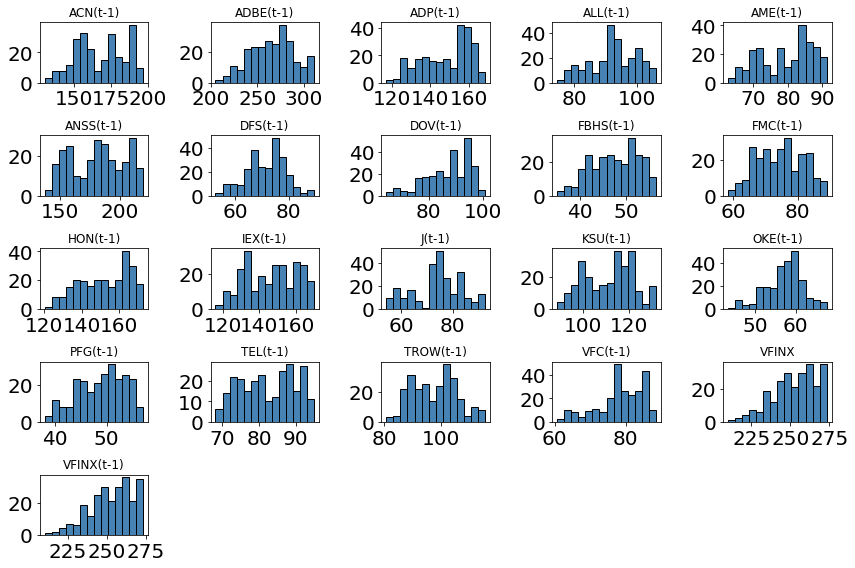

In [4]:
df.hist(bins=14, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=20, ylabelsize=20, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

## Heatmap correlation

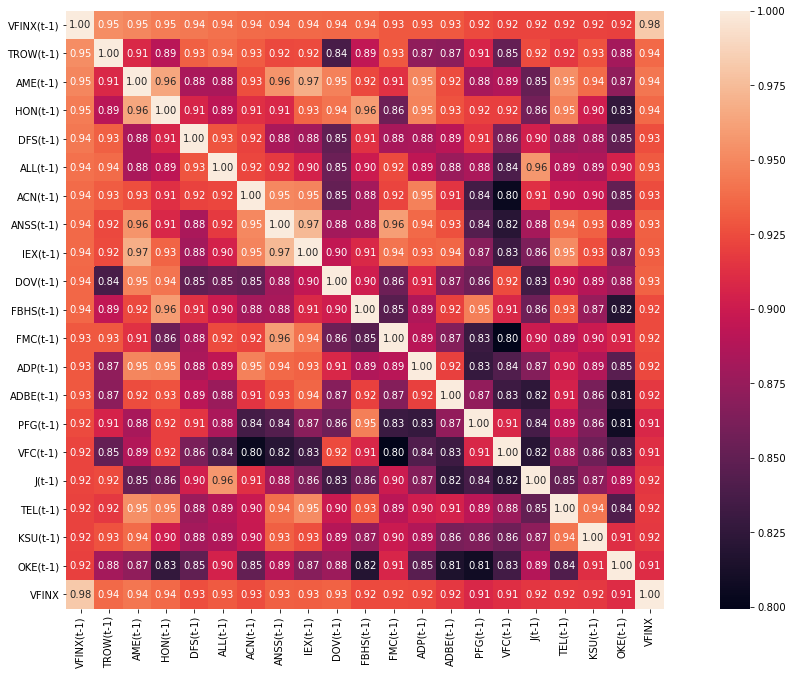

In [5]:
plt.figure(figsize=(20, 11))
sns.heatmap(df.corr(), square= True, annot=True, fmt='.2f')

## Make train test split

In [6]:
# Separate the target from the dataFrame
Y = df['VFINX']
X = df.drop('VFINX', axis=1)

In [15]:
# Convert data to Pytorch tensor
X_t = torch.from_numpy(X.to_numpy()).folat()
Y_t = torch.from_numpy(Y.to_numpy()).float().unsqueeze(1)
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size=0.2, random_state=0)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

## Pandas Train Data

In [ ]:
#dataframe_train = pd.read_csv('train_data-2018-09-29-2019-09-29.csv')
#dataframe_train = dataframe_train.fillna(method='ffill')
#del dataframe_train['Date']
##del dataframe_train['VFINX']
#dataframe_train.shape

## Pandas Test Data

In [ ]:
dataframe_pred = pd.read_csv('predict_data-2019-11-25-2020-11-24.csv')
dataframe_pred = dataframe_pred.fillna(method='ffill')
del dataframe_pred['Date']
tmp = np.array(dataframe_pred['VFINX'])
#del dataframe_pred['VFINX']
dataframe_pred.head()

## Independent and identically distributed (I.I.D.) Testing

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(tmp, lags=40)
plt.show()

## 切割資料

In [ ]:
train_A_d = dataframe_train[:125]#取後面125
train_B_d = dataframe_train[:-124]
test_A_d = dataframe_pred[:125]
test_B_d = dataframe_pred[:-124]
train_B_d

## PCA降維(獲得各主成分的方差)

In [ ]:
import numpy as np  
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)  

X = np.array(train_A_d) 
Y = np.array(train_B_d) 
Z = np.array(test_A_d)
W = np.array(test_B_d)

newData_0 = pca.fit_transform(X)
print(pca.explained_variance_ratio_) ## [1]
newData_0.shape

In [ ]:
newData_1 = pca.fit_transform(Y)
print(pca.explained_variance_ratio_)##[0] 
newData_1.shape

In [ ]:
newData_2 = pca.fit_transform(Z)
print(pca.explained_variance_ratio_) ##[0]
newData_2

In [ ]:
newData_3 = pca.fit_transform(W)
print(pca.explained_variance_ratio_) ##[0]
newData_3.shape#

In [ ]:
print(pca)
## 

PCA

## Normalize test

In [ ]:
from scipy import stats
print(stats.shapiro(newData_3))

## Independent and identically distributed (I.I.D.) Testing

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(newData_3[:,0], lags=40)
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(newData_2[:,0], lags=40)
plt.show()

## Min Max Scaler(資料切割)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## train data
scaler = MinMaxScaler()
scaler = scaler.fit(newData_0)
scaled_train_dataA = scaler.fit_transform(newData_0)
scaled_train_dataA = Variable(torch.tensor(scaled_train_dataA).type(torch.FloatTensor))

scalers = MinMaxScaler()
scalers = scalers.fit(newData_1)
scaled_train_dataB = scaler.fit_transform(newData_1)
scaled_train_dataB = Variable(torch.tensor(scaled_train_dataB).type(torch.FloatTensor))

## Test Data

scalersTestA = MinMaxScaler()
scalersTestA = scalersTestA.fit(newData_2)
scaled_test_dataA = scalersTestA.fit_transform(newData_2)
scaled_test_dataA = Variable(torch.tensor(scaled_test_dataA).type(torch.FloatTensor))

## 
scalersTestB = MinMaxScaler()
scalersTestB = scalersTestB.fit(newData_3)
scaled_test_dataB = scalersTestB.fit_transform(newData_3)
scaled_test_dataB = Variable(torch.tensor(scaled_test_dataB).type(torch.FloatTensor))

scaled_train_dataA[:,1].shape

## Linear Model

In [ ]:
import torch.nn as nn
losses = []
_losses = []

#model = nn.Sequential(torch.nn.Linear(16,7),
            #torch.nn.Linear(7,3),
           # torch.nn.Linear(3,1))
model = nn.Sequential(torch.nn.Linear(1,1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) #使用SGD優化
loss_function = torch.nn.MSELoss()

train = scaled_train_dataA[:,0].reshape(125,1)
train_b = scaled_train_dataB[:,0]

## train mode
model = model.train()

for epoch in range(0,200):
    prediction = model(train)
    #生成訓練數據
    loss = loss_function(prediction,train_b)
    _loss = loss_function(prediction,train[:,0])
    losses.append(loss)
    _losses.append(_loss)
    optimizer.zero_grad() #每次訓練梯度清零
    #loss.backward()
    _loss.backward()#反向傳播計算梯度
    #更新梯度
    optimizer.step()
    if epoch % 10 == 0:
        print(loss)


## Testing and Combine

## Show Loss

In [ ]:
x_plot, = plt.plot(losses)
y_plot, = plt.plot(_losses,'g--')
plt.legend([x_plot,y_plot],['val_loss','loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

## Data Combine and Pred test

In [ ]:
test = scaled_test_dataA[:,0].reshape(125,1)
#test_b = scaled_test_dataB[:,0].reshape(54,1)

model = model.eval()
model = torch.load( 'model.pth')

### 將預測資料和原始測試及資料合併前，將原始測試及選擇那行刪除(不然合併會變成超過原本維度)
A = np.array(scaled_test_dataA)
A = np.delete(A,0,1)
pred = model(test)## 預測的資料
B = np.array(pred.data)
#A[:,0] = np.array(pred.data).reshape(200,)

final = np.column_stack((A,B))
## 合併完成後，利用PCA和min-max將整組資料反轉回去
final = scalersTestA.inverse_transform(final)
final = pca.inverse_transform(final)

final_test = scalersTestA.inverse_transform(scaled_test_dataA)
final_test = pca.inverse_transform(final_test)
final.shape


## Prediction Result

In [ ]:
#plt.figure(figsize=(12,12))
plt.title('model.pth')
x_plot, = plt.plot(B)
y_plot, = plt.plot(test[:,0])
plt.legend([x_plot,y_plot],['Pred data','Origin data'])
plt.xlabel('data number')
plt.ylabel('value')
plt.show()  

## Draw Data(Scaler)

In [ ]:
plt.figure(figsize=(12,12))
plt.title("pred Data")
x_plot, = plt.plot(final[:,18],final[:,20],'o')## 合併後資料第21column是vfinx
y_plot, = plt.plot(final_test[:,18],final_test[:,20],'o')#### testBd為當初切測試資料，留下沒用到的
plt.legend([x_plot,y_plot],['pred','data'])
plt.xlabel('column 20 data')
plt.ylabel('VFINX  data')
plt.show()

In [ ]:
#data1 = np.array(test_b)
#data2 = np.array(pred.data)
#print(data1.shape)
#for i in range(0,124):
  #data1[i] = data1[i] * (dataframe_pred['VFINX'].max() - scal.min_[10]) + scal.min_[10]
  #data2[i] = data2[i] * (dataframe_pred['VFINX'].max() - scal.min_[10]) + scal.min_[10]

#plt.figure(figsize=(15,12))
#x_plot, = plt.plot(data1,'magenta')
#y_plot, = plt.plot(data2, 'g--')
#plt.xlabel('data seq')
#plt.ylabel('vfinx')
#plt.legend([x_plot,y_plot],['data','pred'])
#plt.show()